# Metadataset trends
- This is all preliminary / proof of concept, since we don't have the final data yet

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# special import (so that ReczillaClassifier can be imported)
import os
import sys
HOME = os.environ.get("HOME")
sys.path.insert(0, f"{HOME}/reczilla/RecSys2019_DeepLearning_Evaluation")

In [3]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score
from sklearn.multioutput import RegressorChain
import xgboost as xgb
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42


from ReczillaClassifier.get_alg_feat_selection_data import get_metafeats, compute_feature_corrs
# alg_feature_selection_featurized, 
from ReczillaClassifier.dataset_families import get_all_datasets

In [4]:
# constants

METRICS = ["test_metric_PRECISION_cut_10", "test_metric_MAP_cut_10"]
ALL_DATASETS = list(get_all_datasets())
METADATASET_NAME = "metadata-v1"

metric = METRICS[0]
result_folder = 'plots'

default_colors = [(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
                  (1.0, 0.4980392156862745, 0.054901960784313725),
                  (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
                  (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
                  (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
                  (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
                  (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
                  (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
                  (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
                  (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
                  (0.0, 0.0, 0.0)
                 ]

In [5]:
meta_dataset = get_metafeats(METADATASET_NAME)
feature_corrs = compute_feature_corrs(meta_dataset, [], metric, selected_algs=None)

sanity
Computing correlations...


  0%|                                                                                                                                                                                                                     | 0/1356 [00:00<?, ?it/s]/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
  0%|▎                                                                                                                                                                                                            | 2/1356 [00:00<01:39, 13.56it/s]/Users/colinwhite/Librar

  2%|███▎                                                                                                                                                                                                        | 22/1356 [00:01<01:24, 15.71it/s]/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
  2%|███▌                                                                                                                                                                                                        | 24/1356 [00:01<01:25, 15.52it/s]/Users/colinwhite/Librar

  3%|██████▌                                                                                                                                                                                                     | 44/1356 [00:02<01:22, 15.90it/s]/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
  3%|██████▉                                                                                                                                                                                                     | 46/1356 [00:02<01:22, 15.91it/s]/Users/colinwhite/Librar

  5%|█████████▉                                                                                                                                                                                                  | 66/1356 [00:04<01:26, 14.92it/s]/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
  5%|██████████▏                                                                                                                                                                                                 | 68/1356 [00:04<01:24, 15.19it/s]/Users/colinwhite/Librar

  6%|█████████████▏                                                                                                                                                                                              | 88/1356 [00:05<01:21, 15.57it/s]/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
  7%|█████████████▌                                                                                                                                                                                              | 90/1356 [00:05<01:20, 15.69it/s]/Users/colinwhite/Librar

  8%|████████████████▍                                                                                                                                                                                          | 110/1356 [00:07<01:20, 15.47it/s]/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
  8%|████████████████▊                                                                                                                                                                                          | 112/1356 [00:07<01:19, 15.64it/s]/Users/colinwhite/Librar

 10%|███████████████████▊                                                                                                                                                                                       | 132/1356 [00:08<01:24, 14.55it/s]/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
 10%|████████████████████                                                                                                                                                                                       | 134/1356 [00:08<01:22, 14.83it/s]/Users/colinwhite/Librar

 11%|███████████████████████                                                                                                                                                                                    | 154/1356 [00:09<01:17, 15.51it/s]/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
 12%|███████████████████████▎                                                                                                                                                                                   | 156/1356 [00:10<01:17, 15.55it/s]/Users/colinwhite/Librar

 13%|██████████████████████████▎                                                                                                                                                                                | 176/1356 [00:11<01:14, 15.92it/s]/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
 13%|██████████████████████████▋                                                                                                                                                                                | 178/1356 [00:11<01:13, 15.99it/s]/Users/colinwhite/Librar

 15%|█████████████████████████████▋                                                                                                                                                                             | 198/1356 [00:12<01:12, 15.99it/s]/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
 15%|█████████████████████████████▉                                                                                                                                                                             | 200/1356 [00:12<01:12, 15.97it/s]/Users/colinwhite/Librar

 16%|████████████████████████████████▉                                                                                                                                                                          | 220/1356 [00:14<01:10, 16.14it/s]/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
 16%|█████████████████████████████████▏                                                                                                                                                                         | 222/1356 [00:14<01:10, 16.16it/s]/Users/colinwhite/Librar

 18%|████████████████████████████████████▏                                                                                                                                                                      | 242/1356 [00:15<01:09, 15.92it/s]/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
 18%|████████████████████████████████████▌                                                                                                                                                                      | 244/1356 [00:15<01:09, 16.04it/s]/Users/colinwhite/Librar

 19%|███████████████████████████████████████▌                                                                                                                                                                   | 264/1356 [00:16<01:10, 15.58it/s]/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
 20%|███████████████████████████████████████▊                                                                                                                                                                   | 266/1356 [00:16<01:09, 15.72it/s]/Users/colinwhite/Librar

 21%|██████████████████████████████████████████▊                                                                                                                                                                | 286/1356 [00:18<01:07, 15.85it/s]/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
 21%|███████████████████████████████████████████                                                                                                                                                                | 288/1356 [00:18<01:07, 15.93it/s]/Users/colinwhite/Librar

 23%|██████████████████████████████████████████████                                                                                                                                                             | 308/1356 [00:19<01:06, 15.75it/s]/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
 23%|██████████████████████████████████████████████▍                                                                                                                                                            | 310/1356 [00:19<01:07, 15.60it/s]/Users/colinwhite/Librar

 24%|█████████████████████████████████████████████████▍                                                                                                                                                         | 330/1356 [00:21<01:05, 15.70it/s]/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
 24%|█████████████████████████████████████████████████▋                                                                                                                                                         | 332/1356 [00:21<01:04, 15.81it/s]/Users/colinwhite/Librar

 26%|████████████████████████████████████████████████████▋                                                                                                                                                      | 352/1356 [00:22<01:02, 15.95it/s]/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
 26%|████████████████████████████████████████████████████▉                                                                                                                                                      | 354/1356 [00:22<01:02, 16.02it/s]/Users/colinwhite/Librar

 28%|███████████████████████████████████████████████████████▉                                                                                                                                                   | 374/1356 [00:23<01:01, 15.88it/s]/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
 28%|████████████████████████████████████████████████████████▎                                                                                                                                                  | 376/1356 [00:23<01:01, 15.88it/s]/Users/colinwhite/Librar

 29%|███████████████████████████████████████████████████████████▎                                                                                                                                               | 396/1356 [00:25<00:59, 16.06it/s]/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
 29%|███████████████████████████████████████████████████████████▌                                                                                                                                               | 398/1356 [00:25<00:59, 16.09it/s]/Users/colinwhite/Librar

 31%|██████████████████████████████████████████████████████████████▌                                                                                                                                            | 418/1356 [00:26<00:58, 16.02it/s]/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
 31%|██████████████████████████████████████████████████████████████▉                                                                                                                                            | 420/1356 [00:26<00:59, 15.74it/s]/Users/colinwhite/Librar

 32%|█████████████████████████████████████████████████████████████████▊                                                                                                                                         | 440/1356 [00:27<00:56, 16.13it/s]/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
 33%|██████████████████████████████████████████████████████████████████▏                                                                                                                                        | 442/1356 [00:28<00:56, 16.16it/s]/Users/colinwhite/Librar

 34%|█████████████████████████████████████████████████████████████████████▏                                                                                                                                     | 462/1356 [00:29<00:55, 15.98it/s]/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
 34%|█████████████████████████████████████████████████████████████████████▍                                                                                                                                     | 464/1356 [00:29<00:55, 15.98it/s]/Users/colinwhite/Librar

 36%|████████████████████████████████████████████████████████████████████████▍                                                                                                                                  | 484/1356 [00:30<00:54, 15.96it/s]/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
 36%|████████████████████████████████████████████████████████████████████████▊                                                                                                                                  | 486/1356 [00:30<00:54, 16.04it/s]/Users/colinwhite/Librar

 37%|███████████████████████████████████████████████████████████████████████████▊                                                                                                                               | 506/1356 [00:32<00:53, 15.94it/s]/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
 37%|████████████████████████████████████████████████████████████████████████████                                                                                                                               | 508/1356 [00:32<00:53, 15.93it/s]/Users/colinwhite/Librar

 39%|███████████████████████████████████████████████████████████████████████████████                                                                                                                            | 528/1356 [00:33<00:51, 16.10it/s]/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
 39%|███████████████████████████████████████████████████████████████████████████████▎                                                                                                                           | 530/1356 [00:33<00:51, 16.08it/s]/Users/colinwhite/Librar

 41%|██████████████████████████████████████████████████████████████████████████████████▎                                                                                                                        | 550/1356 [00:34<00:50, 15.83it/s]/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
 41%|██████████████████████████████████████████████████████████████████████████████████▋                                                                                                                        | 552/1356 [00:34<00:50, 15.91it/s]/Users/colinwhite/Librar

 42%|█████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                     | 572/1356 [00:36<00:49, 15.75it/s]/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
 42%|█████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                     | 574/1356 [00:36<00:50, 15.63it/s]/Users/colinwhite/Librar

 44%|████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                  | 594/1356 [00:37<00:47, 16.00it/s]/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
 44%|█████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                 | 596/1356 [00:37<00:47, 15.93it/s]/Users/colinwhite/Librar

 45%|████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                              | 616/1356 [00:38<00:46, 16.02it/s]/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
 46%|████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                              | 618/1356 [00:39<00:46, 15.92it/s]/Users/colinwhite/Librar

 47%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                           | 638/1356 [00:40<00:45, 15.79it/s]/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
 47%|███████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                           | 640/1356 [00:40<00:45, 15.83it/s]/Users/colinwhite/Librar

 49%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                        | 660/1356 [00:41<00:43, 16.02it/s]/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
 49%|███████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                        | 662/1356 [00:41<00:43, 16.03it/s]/Users/colinwhite/Librar

 50%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                     | 682/1356 [00:43<00:42, 15.92it/s]/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
 50%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                    | 684/1356 [00:43<00:42, 15.99it/s]/Users/colinwhite/Librar

 52%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                 | 704/1356 [00:44<00:40, 15.93it/s]/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
 52%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                 | 706/1356 [00:44<00:40, 15.90it/s]/Users/colinwhite/Librar

 54%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                              | 726/1356 [00:45<00:39, 15.96it/s]/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
 54%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                              | 728/1356 [00:45<00:39, 15.93it/s]/Users/colinwhite/Librar

 55%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                           | 748/1356 [00:47<00:37, 16.04it/s]/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
 55%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                          | 750/1356 [00:47<00:37, 16.07it/s]/Users/colinwhite/Librar

 57%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                       | 770/1356 [00:48<00:36, 16.01it/s]/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
 57%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                       | 772/1356 [00:48<00:36, 15.88it/s]/Users/colinwhite/Librar

 58%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                    | 792/1356 [00:49<00:35, 15.77it/s]/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
 59%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                    | 794/1356 [00:50<00:35, 15.77it/s]/Users/colinwhite/Librar

 60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                 | 814/1356 [00:51<00:34, 15.94it/s]/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
 60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                | 816/1356 [00:51<00:33, 16.01it/s]/Users/colinwhite/Librar

 62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                             | 836/1356 [00:52<00:32, 16.00it/s]/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
 62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                             | 838/1356 [00:52<00:32, 15.96it/s]/Users/colinwhite/Librar

 63%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                          | 858/1356 [00:54<00:31, 15.95it/s]/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
 63%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                          | 860/1356 [00:54<00:31, 15.88it/s]/Users/colinwhite/Librar

 65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                       | 880/1356 [00:55<00:29, 15.94it/s]/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
 65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                       | 882/1356 [00:55<00:29, 15.98it/s]/Users/colinwhite/Librar

 67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                    | 902/1356 [00:56<00:28, 16.03it/s]/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
 67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                   | 904/1356 [00:56<00:28, 16.01it/s]/Users/colinwhite/Librar

 68%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                | 924/1356 [00:58<00:27, 15.99it/s]/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
 68%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                | 926/1356 [00:58<00:26, 16.06it/s]/Users/colinwhite/Librar

 70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                             | 946/1356 [00:59<00:25, 16.07it/s]/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
 70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                             | 948/1356 [00:59<00:25, 16.06it/s]/Users/colinwhite/Librar

 71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                          | 968/1356 [01:00<00:24, 15.73it/s]/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
 72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                         | 970/1356 [01:01<00:24, 15.76it/s]/Users/colinwhite/Librar

 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                      | 990/1356 [01:02<00:23, 15.84it/s]/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                      | 992/1356 [01:02<00:22, 15.88it/s]/Users/colinwhite/Librar

 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                   | 1012/1356 [01:03<00:21, 16.05it/s]/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                   | 1014/1356 [01:03<00:21, 15.98it/s]/Users/colinwhite/Librar

 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                | 1034/1356 [01:05<00:20, 15.96it/s]/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                               | 1036/1356 [01:05<00:20, 15.97it/s]/Users/colinwhite/Librar

 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                            | 1056/1356 [01:06<00:18, 15.89it/s]/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 1058/1356 [01:06<00:18, 15.86it/s]/Users/colinwhite/Librar

 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                         | 1078/1356 [01:07<00:17, 16.11it/s]/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                         | 1080/1356 [01:07<00:17, 16.12it/s]/Users/colinwhite/Librar

 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                      | 1100/1356 [01:09<00:15, 16.18it/s]/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 1102/1356 [01:09<00:15, 16.05it/s]/Users/colinwhite/Librar

 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 1122/1356 [01:10<00:14, 16.27it/s]/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 1124/1356 [01:10<00:14, 16.19it/s]/Users/colinwhite/Librar

 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                               | 1144/1356 [01:11<00:13, 16.25it/s]/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                               | 1146/1356 [01:12<00:12, 16.19it/s]/Users/colinwhite/Librar

 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                            | 1166/1356 [01:13<00:11, 16.17it/s]/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 1168/1356 [01:13<00:11, 16.29it/s]/Users/colinwhite/Librar

 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                         | 1188/1356 [01:14<00:10, 16.13it/s]/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                        | 1190/1356 [01:14<00:10, 16.16it/s]/Users/colinwhite/Librar

 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 1210/1356 [01:16<00:09, 15.98it/s]/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 1212/1356 [01:16<00:08, 16.01it/s]/Users/colinwhite/Librar

 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 1232/1356 [01:17<00:07, 15.97it/s]/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 1234/1356 [01:17<00:07, 16.00it/s]/Users/colinwhite/Librar

 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 1254/1356 [01:18<00:06, 15.93it/s]/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████               | 1256/1356 [01:18<00:06, 15.95it/s]/Users/colinwhite/Librar

 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████            | 1276/1356 [01:20<00:04, 16.05it/s]/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 1278/1356 [01:20<00:04, 16.07it/s]/Users/colinwhite/Librar

 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 1298/1356 [01:21<00:03, 16.05it/s]/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 1300/1356 [01:21<00:03, 16.03it/s]/Users/colinwhite/Librar

 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 1320/1356 [01:22<00:02, 15.97it/s]/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 1322/1356 [01:23<00:02, 15.94it/s]/Users/colinwhite/Librar

 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 1342/1356 [01:24<00:00, 15.83it/s]/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 1344/1356 [01:24<00:00, 15.86it/s]/Users/colinwhite/Librar

In [6]:
### highest correlations between algorithm-hparam performance and individual meta-features (across datasets)

# todo (non top priority): check whether algs in the top predicted corrs actually perform okay?
# todo (non top priority): weight by dataset family. Right now it is biased towards amazon

print('metric is', metric)

no_nan = feature_corrs.fillna(0)

print('\nHighest corrs between an alg and meta-feature:\n')
top_corrs = []
for alg in no_nan.columns:
    top_three = no_nan[alg].sort_values(ascending=False)[:3]
    top_corrs.append((top_three[0], alg, top_three.index[0]))

top_corrs.sort(reverse=True)
for t in top_corrs[:5]:
    print(t)

print('\nHighest corrs between an alg and non-landmarker meta-feature:\n')
no_landmarks = no_nan.loc[:'f_item_user_ratio', :]
top_corrs = []

algs = []
for alg in no_landmarks.columns:
    top_three = no_landmarks[alg].sort_values(ascending=False)[:3]
    top_corrs.append((top_three[0], alg, top_three.index[0]))
    algs.append(alg)
    
top_corrs.sort(reverse=True)
for t in top_corrs[:5]:
    print(t)


metric is test_metric_PRECISION_cut_10

Highest corrs between an alg and meta-feature:

(0.9056423389470334, 'IALSRecommender:random_12', 'f_landmarker__alg_top_pop__cut_5__COVERAGE_ITEM_HIT')
(0.8821117556441022, 'MatrixFactorization_AsySVD_Cython:random_53', 'f_item_user_ratio')
(0.8783470307876644, 'IALSRecommender:random_46', 'f_landmarker__alg_pure_svd_fact1__cut_1__DIVERSITY_MEAN_INTER_LIST')
(0.8641610346127558, 'IALSRecommender:random_9', 'f_landmarker__alg_user_knn_k1__cut_1__SHANNON_ENTROPY')
(0.8632870880432024, 'SLIM_BPR_Cython:random_82', 'f_dist_feature__kind_item__pre_agg_func_sum__agg_func_std')

Highest corrs between an alg and non-landmarker meta-feature:

(0.8821117556441022, 'MatrixFactorization_AsySVD_Cython:random_53', 'f_item_user_ratio')
(0.8632870880432024, 'SLIM_BPR_Cython:random_82', 'f_dist_feature__kind_item__pre_agg_func_sum__agg_func_std')
(0.8624524924944507, 'SLIM_BPR_Cython:random_13', 'f_dist_feature__kind_item__pre_agg_func_sum__agg_func_std')
(0.858

In [7]:
## find the properties of a dataset that makes it hard to train a good recommender system
## compute correlation between hardness=max_algos(metric) on each dataset, and all meta-features

## takes a bit of time to run

# todo (non top priority): weight by dataset family. Right now it is biased towards amazon

print('metric is', metric)
metric = 'PRECISION_cut_10'


all_max_perfs = []
all_datasets = []
# compute the "easiness" of each dataset, defined as best performance over all algorithms
for dataset_name, dataset_performance in meta_dataset.groupby("dataset_name"):
    max_value = max(dataset_performance["test_metric_" + metric])
    all_max_perfs.append(max_value)
    all_datasets.append(dataset_name)
    
# for each meta-feature, compute corr between meta-feature and easiness (across datasets)

all_features = [col for col in meta_dataset.columns if col.startswith("f_")]
corrs = []
for i, feat in enumerate(all_features):
    if i % 50 == 0:
        print('at', i)
    # there must be a much faster way to do this. All I want to do is get the metafeature values for each dataset
    values = []
    for dataset_name in all_datasets:
        value = meta_dataset.loc[(meta_dataset["dataset_name"] == dataset_name)][feat].iat[0]
        values.append(value)

    # now compute the correlation between the meta-feature and the max-performance
    corr = stats.spearmanr(all_max_perfs, values)[0]
    positive = (corr == abs(corr))
    corrs.append((abs(corr), positive, feat))

corrs.sort(reverse = True)

# print most correlated features
print('\nFeatures most correlated with dataset "hardness":')
for c in corrs[:10]:
    print(c)


metric is test_metric_PRECISION_cut_10
at 0
at 50


/Users/colinwhite/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


at 100
at 150
at 200
at 250
at 300
at 350

Features most correlated with dataset "hardness":
(0.42490924814484143, True, 'f_dist_feature__kind_rating__pre_agg_func_None__agg_func_entropy')
(0.4063513777604065, False, 'f_dist_feature__kind_item__pre_agg_func_count__agg_func_kurtosis')
(0.39767441860465114, False, 'f_dist_feature__kind_item__pre_agg_func_sum__agg_func_kurtosis')
(0.3853820598006645, False, 'f_dist_feature__kind_item__pre_agg_func_count__agg_func_skewness')
(0.3795583349618917, False, 'f_dist_feature__kind_user__pre_agg_func_count__agg_func_kurtosis')
(0.3683408247019738, False, 'f_dist_feature__kind_item__pre_agg_func_sum__agg_func_skewness')
(0.36690622878212376, True, 'f_dist_feature__kind_item__pre_agg_func_mean__agg_func_entropy')
(0.3500455582673706, False, 'f_dist_feature__kind_item__pre_agg_func_mean__agg_func_mode')
(0.34635743079364056, True, 'f_dist_feature__kind_item__pre_agg_func_sum__agg_func_median')
(0.33208864065807586, True, 'f_dist_feature__kind_user__p

In [8]:
#print(list(meta_dataset['alg_param_name']))

dataset failed: AnimeReader NMFRecommender:default
dataset failed: Jester2Reader NMFRecommender:default
dataset failed: NetflixPrizeReader MatrixFactorization_FunkSVD_Cython:default
dataset failed: YahooMusicReader MatrixFactorization_FunkSVD_Cython:default
num datasets to plot: 24


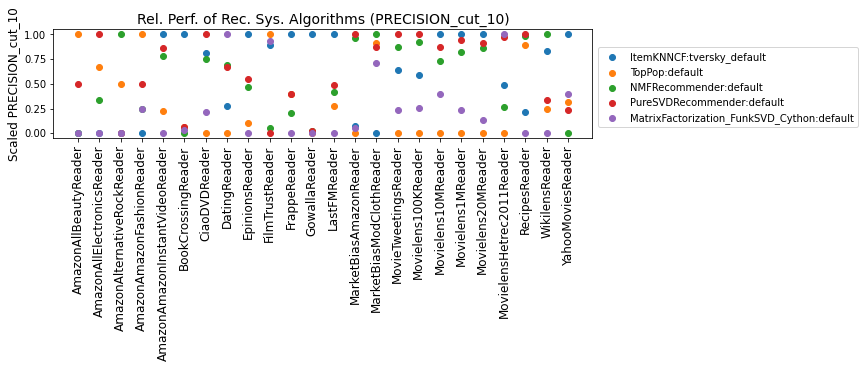

In [9]:
## dot plots of performance of ~5 algos on each dataset

## todo (not top priority): for each dataset, could plot max performance across params of an alg
## todo (not top priority): cut down the names of the datasets (make them two lines?) and algorithms (remove "default")

# pick 5 algorithms that don't fail on most datasets, and perform well on some datasets (and ideally have varied top performance):
algs = ['ItemKNNCF:tversky_default', 'TopPop:default', 'NMFRecommender:default', 'PureSVDRecommender:default', 'MatrixFactorization_FunkSVD_Cython:default']
# MatrixFactorization_FunkSVD_Cython:default     CoClustering:default   NMFRecommender:default   P3alphaRecommender:default
plot_width = .42 * 23
fig, ax = plt.subplots(figsize=(plot_width,2))

width = 0
datasets = []
dataset_families = {}
datasets_per_family = 5
for dataset_name, dataset_performance in meta_dataset.groupby("dataset_name"):
    # only plot a few datasets per family:
    dataset_family = dataset_performance['dataset_family'].iloc[0]
    if dataset_family in dataset_families:
        if dataset_families[dataset_family] < datasets_per_family:
            dataset_families[dataset_family] += 1
        else:
            continue
    else:
        dataset_families[dataset_family] = 1

    perfs = []
    fail = False
    for alg in algs:
        perf = dataset_performance.loc[dataset_performance["alg_param_name"] == alg]["test_metric_" + metric]
        if len(perf) > 0:
            perfs.append(perf.iloc[0])
        else:
            print('dataset failed:', dataset_name, alg)
            fail = True
    if fail:
        continue
    
    # now scale the values in [0,1]
    min_perf, max_perf = np.min(perfs), np.max(perfs)
    perfs = [(p - min_perf) / (max_perf - min_perf) for p in perfs]
    datasets.append(dataset_name)
    
    width += 1
    for i, alg in enumerate(algs):
        color = default_colors[i]
        if width == 1:
            ax.scatter(width, perfs[i], label=alg, color=color, marker='o')
        else:
            ax.scatter(width, perfs[i], color=color, marker='o')

print('num datasets to plot:', width)
ax.legend(loc=(1.01,.1))
ax.set_xticklabels(datasets, fontsize=12, rotation=90)
ax.set_xticks(range(1, len(datasets)+1))
ax.set_ylabel('Scaled '+metric, fontsize=12)   

#ax.set_title('Scaled Spearman Rank Correlation of Performance Predictors', fontsize=14)
ax.set_title('Rel. Perf. of Rec. Sys. Algorithms ('+metric+')', fontsize=14)

save = False
if save:
    plt.savefig(result_folder + '/dotplot.pdf', bbox_inches = 'tight', pad_inches = 0.1)


In [10]:
# box plots of performance across all algs on each dataset
# pick 3 datasets per family to plot

# takes a bit of time to run, so plotting is in the next cell

full_alg_param_list = meta_dataset["alg_param_name"].values
threshold = len(full_alg_param_list) / 100

datasets = []
boxplot_data = []
dataset_families = {}
for dataset_name, dataset_performance in meta_dataset.groupby("dataset_name"):
    dataset_family = dataset_performance['dataset_family'].iloc[0]
    if dataset_family in dataset_families:
        if dataset_families[dataset_family] < 3:
            dataset_families[dataset_family] += 1
        else:
            continue
    else:
        dataset_families[dataset_family] = 1

    print(dataset_name)
    #if len(boxplot_data) > 10:
    #    break

    perfs = []
    for alg_param in full_alg_param_list:
        perf = dataset_performance.loc[dataset_performance["alg_param_name"] == alg_param]["test_metric_" + metric]
        if len(perf) > 0:
            perfs.append(perf.iloc[0])

    if len(perfs) < threshold:
        print('dataset failed:', dataset_name, len(perfs), '/', len(full_alg_param_list))
        continue

    datasets.append(dataset_name)

    boxes = {
        'label' : dataset_name,
        'whislo': min(perfs),
        'q1'    : np.percentile(perfs, 25),
        'med'   : np.median(perfs),
        'q3'    : np.percentile(perfs, 75),
        'whishi': max(perfs),
        'fliers': []
    }
    boxplot_data.append(boxes)

AmazonAllBeautyReader
AmazonAllElectronicsReader
AmazonAlternativeRockReader
AnimeReader
BookCrossingReader
CiaoDVDReader
DatingReader
EpinionsReader
FilmTrustReader
FrappeReader
GowallaReader
Jester2Reader
LastFMReader
MarketBiasAmazonReader
MarketBiasModClothReader
MovieTweetingsReader
Movielens100KReader
Movielens10MReader
Movielens1MReader
NetflixPrizeReader
RecipesReader
WikilensReader
YahooMoviesReader
YahooMusicReader


num datasets to plot: 24


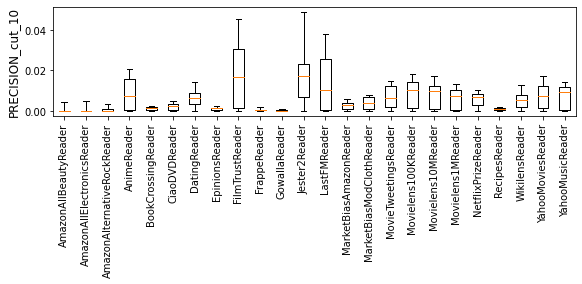

In [11]:
print('num datasets to plot:', len(datasets))
plot_width = .39 * len(boxplot_data)

fig, ax = plt.subplots(figsize=(plot_width,2))

ax.bxp(boxplot_data)
plt.xticks(rotation = 90)
ax.set_ylabel(metric, fontsize=12)   
save = False
if save:
    plt.savefig(result_folder + '/boxplot.pdf', bbox_inches = 'tight', pad_inches = 0.1)

In [ ]:
#### done
# highest correlations between algorithm performance and individual meta-features
# correlation between hardness=max_algos(metric) on each dataset, and all meta-features
# dot plots of performance of ~5 algos on each dataset
# box plots of performance across all algs on each dataset

#### possible todo's:

# HPO transfer matrices https://arxiv.org/pdf/2201.13396.pdf

# table of avg rankings of the algs ?
# plot of #users, #items, #interactions ?

# mutual satisfiability of different metrics ---- think about something interesting that studies relns between metrics
# for example, matrix where the rows/cols are metrics, and entry (i,j) is the corr of metric i with metric j averaged over all algos/datasets
